In [1]:
print("hello")

hello


In [2]:
import pandas as pd

# Load the dataset to get an overview
file_path = 'train.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its summary
data.head(), data.info(), data.describe()



C:\Users\91883\AppData\Local\Temp\ipykernel_12372\2959074336.py:5: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

(       ID Customer_ID     Month           Name   Age          SSN Occupation  \
 0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
 1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
 2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
 3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
 4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   
 
   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
 0      19114.12            1824.843333                  3  ...           _   
 1      19114.12                    NaN                  3  ...        Good   
 2      19114.12                    NaN                  3  ...        Good   
 3      19114.12                    NaN                  3  ...        Good   
 4      19114.12            1824.843333                  3  ...        Good   
 
    Outstanding_Debt Credit_Utilizat

In [3]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Data type conversion: converting 'Age', 'Annual_Income' to numerical types where needed
# Let's see the unique values in 'Age' and 'Annual_Income' first to understand the conversion needs
age_unique = data['Age'].unique()
annual_income_unique = data['Annual_Income'].unique()

# Display missing values and unique values for these columns
missing_values, age_unique, annual_income_unique


(ID                              0
 Customer_ID                     0
 Month                           0
 Name                         9985
 Age                             0
 SSN                             0
 Occupation                      0
 Annual_Income                   0
 Monthly_Inhand_Salary       15002
 Num_Bank_Accounts               0
 Num_Credit_Card                 0
 Interest_Rate                   0
 Num_of_Loan                     0
 Type_of_Loan                11408
 Delay_from_due_date             0
 Num_of_Delayed_Payment       7002
 Changed_Credit_Limit            0
 Num_Credit_Inquiries         1965
 Credit_Mix                      0
 Outstanding_Debt                0
 Credit_Utilization_Ratio        0
 Credit_History_Age           9030
 Payment_of_Min_Amount           0
 Total_EMI_per_month             0
 Amount_invested_monthly      4479
 Payment_Behaviour               0
 Monthly_Balance              1200
 Credit_Score                    0
 dtype: int64,
 arra

In [4]:
import numpy as np

# Function to clean numerical columns with non-numeric characters
# Function to clean numerical columns with non-numeric characters
def clean_numeric(column):
    return pd.to_numeric(column.str.replace('[^0-9.]', ''), errors='coerce')

# Clean 'Age' and convert to float
data['Age'] = clean_numeric(data['Age']).astype('float')

# Clean 'Annual_Income' and convert to float
data['Annual_Income'] = clean_numeric(data['Annual_Income']).astype('float')

# Fill missing values for 'Monthly_Inhand_Salary' with the median
data['Monthly_Inhand_Salary'].fillna(data['Monthly_Inhand_Salary'].median(), inplace=True)

# Fill missing categorical values with mode (most frequent value)
for column in ['Name', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

# Check cleaned data types and missing values after cleaning
data.info(), data.head()


C:\Users\91883\AppData\Local\Temp\ipykernel_12372\261361298.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  return pd.to_numeric(column.str.replace('[^0-9.]', ''), errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              100000 non-null  ob

(None,
        ID Customer_ID     Month           Name    Age          SSN Occupation  \
 0  0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265  Scientist   
 1  0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265  Scientist   
 2  0x1604   CUS_0xd40     March  Aaron Maashoh  500.0  821-00-0265  Scientist   
 3  0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265  Scientist   
 4  0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265  Scientist   
 
    Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
 0       19114.12            1824.843333                  3  ...           _   
 1       19114.12            3093.745000                  3  ...        Good   
 2       19114.12            3093.745000                  3  ...        Good   
 3       19114.12            3093.745000                  3  ...        Good   
 4       19114.12            1824.843333                  3  ...        Good   
 
    Outstanding_D

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply t-SNE to reduce dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create DataFrame for plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_tsne = pd.DataFrame(X_tsne, columns=['t-SNE1', 't-SNE2'])

NameError: name 'X' is not defined

KeyboardInterrupt: 

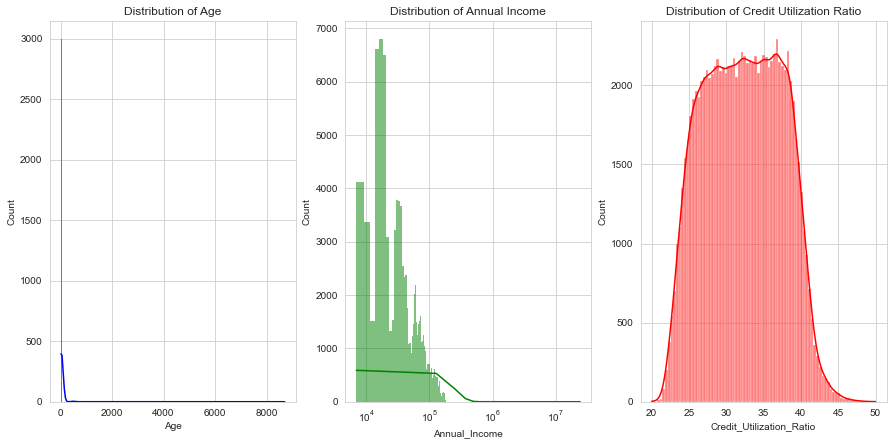

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure to hold the subplots
plt.figure(figsize=(15, 7))

# Histogram of Age
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Distribution of Age')

# Histogram of Annual Income
plt.subplot(1, 3, 2)
sns.histplot(data['Annual_Income'], kde=True, color='green')
plt.title('Distribution of Annual Income')
plt.xscale('log')  # Using log scale due to wide range of incomes

# Histogram of Credit Utilization Ratio
plt.subplot(1, 3, 3)
sns.histplot(data['Credit_Utilization_Ratio'], kde=True, color='red')
plt.title('Distribution of Credit Utilization Ratio')

# Show the plots
plt.tight_layout()
plt.show()

# Correlation heatmap of selected numerical features
plt.figure(figsize=(10, 6))
numeric_features = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
corr_matrix = data[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [ ]:
# Set up the plotting
plt.figure(figsize=(18, 12))

# Plot for Occupation distribution
plt.subplot(2, 2, 1)
sns.countplot(y='Occupation', data=data, order=data['Occupation'].value_counts().index[:10])
plt.title('Top 10 Occupations')
plt.xlabel('Frequency')
plt.ylabel('Occupation')

# Plot for Credit Mix distribution
plt.subplot(2, 2, 2)
sns.countplot(x='Credit_Mix', data=data, order=data['Credit_Mix'].value_counts().index)
plt.title('Credit Mix Distribution')
plt.xlabel('Credit Mix')
plt.ylabel('Count')

# Plot for Payment Behaviour
plt.subplot(2, 2, 3)
sns.countplot(y='Payment_Behaviour', data=data, order=data['Payment_Behaviour'].value_counts().index)
plt.title('Payment Behaviour Distribution')
plt.xlabel('Count')
plt.ylabel('Payment Behaviour')

# Show the plots
plt.tight_layout()
plt.show()


C:\Users\91883\anaconda3\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
C:\Users\91883\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  line, = ax.plot([], [], **kws)
C:\Users\91883\anaconda3\lib\site-packages\seaborn\relational.py:436: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout, = ax.plot([], [], **kws)
C:\Users\91883\anaconda3\lib\site-packages\seaborn\relational.py:514: MatplotlibDeprecationWarning: Support for p

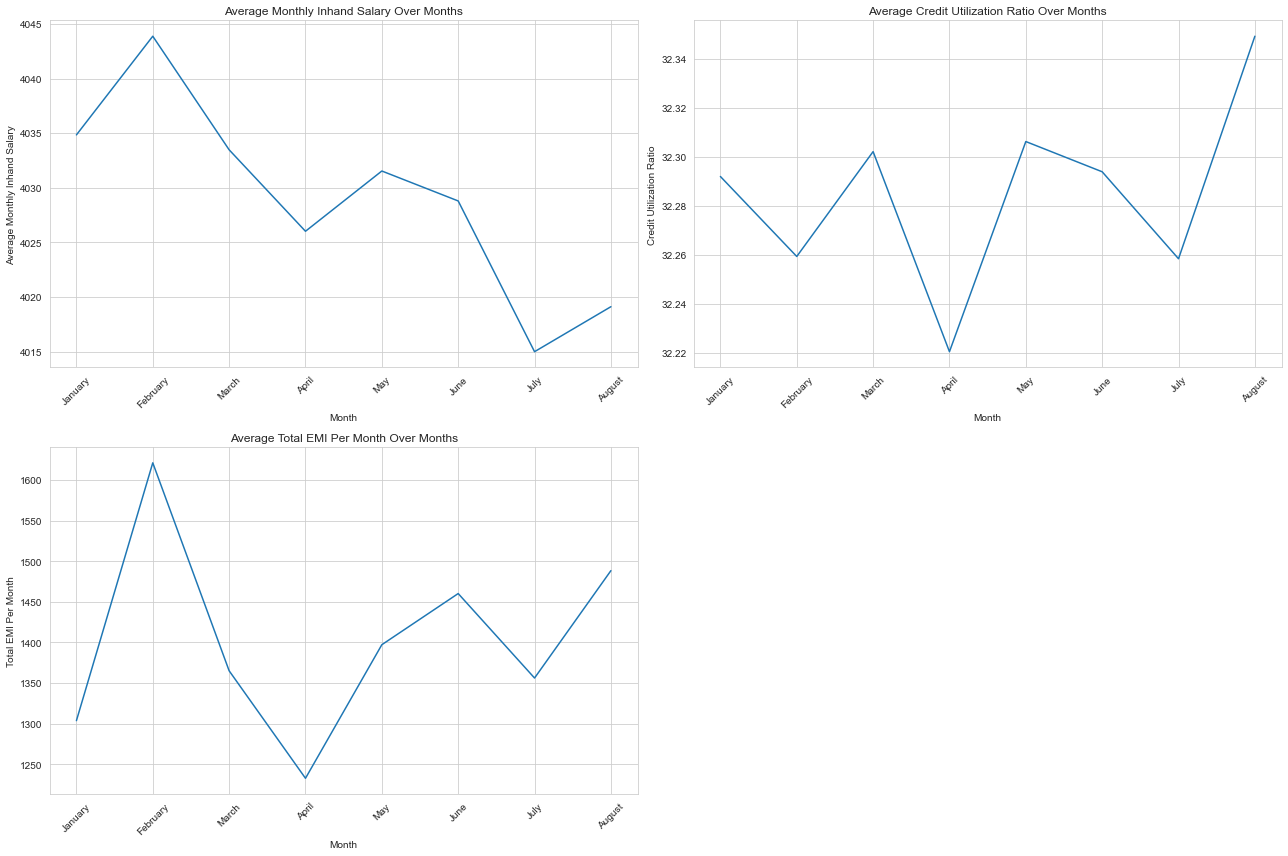

In [126]:
# Convert 'Month' to a categorical type with a logical order for proper visualization
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

# Set up the plotting
plt.figure(figsize=(18, 12))

# Plot for Monthly Inhand Salary over Months
plt.subplot(2, 2, 1)
sns.lineplot(x='Month', y='Monthly_Inhand_Salary', data=data, estimator=np.mean, ci=None)
plt.title('Average Monthly Inhand Salary Over Months')
plt.xlabel('Month')
plt.ylabel('Average Monthly Inhand Salary')
plt.xticks(rotation=45)

# Plot for Credit Utilization Ratio over Months
plt.subplot(2, 2, 2)
sns.lineplot(x='Month', y='Credit_Utilization_Ratio', data=data, estimator=np.mean, ci=None)
plt.title('Average Credit Utilization Ratio Over Months')
plt.xlabel('Month')
plt.ylabel('Credit Utilization Ratio')
plt.xticks(rotation=45)

# Plot for Total EMI per Month over Months
plt.subplot(2, 2, 3)
sns.lineplot(x='Month', y='Total_EMI_per_month', data=data, estimator=np.mean, ci=None)
plt.title('Average Total EMI Per Month Over Months')
plt.xlabel('Month')
plt.ylabel('Total EMI Per Month')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


In [82]:
import pandas as pd



# Extracting relevant columns for transaction data
transaction_data = data[['Customer_ID', 'Month', 'Type_of_Loan', 'Payment_Behaviour']].copy()

# Creating a function to combine loan types and payment behaviors into transaction lists
def combine_items(row):
    # Handling missing values and splitting loan types into individual items if there are multiple loans listed
    loans = str(row['Type_of_Loan']).split(',') if pd.notnull(row['Type_of_Loan']) else []
    behaviors = [row['Payment_Behaviour']]
    return list(set(loans + behaviors))

# Applying the function to create a list of items for each transaction
transaction_data['Items'] = transaction_data.apply(combine_items, axis=1)

# Dropping the original columns as they are no longer needed
transaction_data.drop(['Type_of_Loan', 'Payment_Behaviour'], axis=1, inplace=True)

# Aggregating items by Customer_ID and Month to form unique transactions
grouped_transactions = transaction_data.groupby(['Customer_ID', 'Month'])['Items'].sum().reset_index()

# Preview the aggregated transaction data
print(grouped_transactions.head())

  Customer_ID     Month                                              Items
0  CUS_0x1000     April  [ and Home Equity Loan, Credit-Builder Loan, !...
1  CUS_0x1000    August  [ and Home Equity Loan, Credit-Builder Loan, H...
2  CUS_0x1000  February  [ and Home Equity Loan, Credit-Builder Loan, H...
3  CUS_0x1000   January  [ and Home Equity Loan, Credit-Builder Loan, L...
4  CUS_0x1000      July  [Low_spent_Small_value_payments,  and Home Equ...


In [83]:
from mlxtend.preprocessing import TransactionEncoder

# Create a transaction encoder instance
encoder = TransactionEncoder()

# Fit and transform the data to a boolean array
transaction_array = encoder.fit_transform(grouped_transactions['Items'])

# Convert the array to a DataFrame with item names as columns
binary_transactions = pd.DataFrame(transaction_array, columns=encoder.columns_)

# Preview the binary encoded transaction data
binary_transactions.head()


Auto Loan   Credit-Builder Loan   Debt Consolidation Loan  \
0       False                 False                     False   
1       False                 False                     False   
2       False                 False                     False   
3       False                 False                     False   
4       False                 False                     False   

    Home Equity Loan   Mortgage Loan   Not Specified   Payday Loan  \
0              False           False           False         False   
1              False           False           False         False   
2              False           False           False         False   
3              False           False           False         False   
4              False           False           False         False   

    Personal Loan   Student Loan   and Auto Loan  ...  \
0           False          False           False  ...   
1           False          False           False  ...   
2           False          False           False  ...   
3           False          False           False  ...   
4           False          False           False  ...   

   High_spent_Small_value_payments  Home Equity Loan  \
0                            False             False   
1                            False             False   
2                             True             False   
3                            False             False   
4                            False             False   

   Low_spent_Large_value_payments  Low_spent_Medium_value_payments  \
0                           False                            False   
1                           False                            False   
2                           False                            False   
3                            True                            False   
4                           False                            False   

   Low_spent_Small_value_payments  Mortgage Loan  Not Specified  Payday Loan  \
0                           False          False          False        False   
1                           False          False          False        False   
2                           False          False          False        False   
3                           False          False          False        False   
4                            True          False          False        False   

   Personal Loan  Student Loan  
0          False         False  
1          False         False  
2          False         False  
3          False         False  
4          False         False  

[5 rows x 34 columns]

In [92]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules



# Apply Apriori to find frequent itemsets
# Adjust the min_support threshold as necessary
frequent_itemsets = apriori(binary_transactions, min_support=0.05, use_colnames=True)

# Generate association rules
# You can adjust the metric and min_threshold as needed
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Display the rules sorted by confidence
rules.sort_values(by="confidence", ascending=False, inplace=True)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                         antecedents                       consequents  \
33               ( Home Equity Loan)                    ( Payday Loan)   
15            ( Credit-Builder Loan)                    ( Payday Loan)   
39                  ( Mortgage Loan)                  ( Not Specified)   
0                       ( Auto Loan)            ( Credit-Builder Loan)   
14                    ( Payday Loan)            ( Credit-Builder Loan)   
16                  ( Personal Loan)            ( Credit-Builder Loan)   
32                    ( Payday Loan)               ( Home Equity Loan)   
49                  ( Personal Loan)                  ( Not Specified)   
38                  ( Not Specified)                  ( Mortgage Loan)   
8                ( Home Equity Loan)            ( Credit-Builder Loan)   
46                  ( Not Specified)                    ( Payday Loan)   
52                   ( Student Loan)                    ( Payday Loan)   
47                    ( Payday Loan)  

C:\Users\91883\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
C:\Users\91883\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


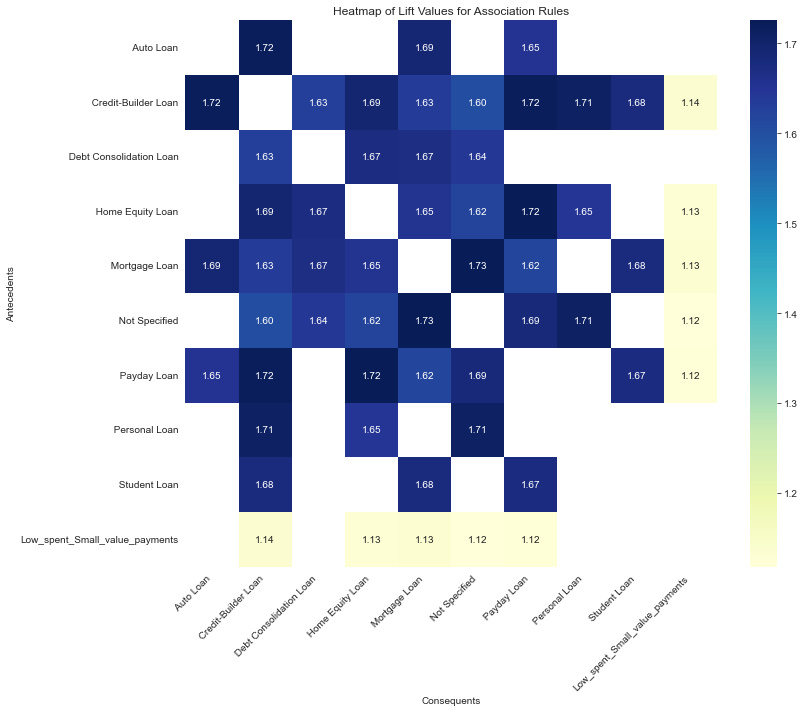

In [127]:

# Data Manipulation for Visualization
# Convert frozenset items in antecedents and consequents into string to allow pivot table creation
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Create a pivot table for the heatmap
pivot_table = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Creating the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap of Lift Values for Association Rules")
plt.ylabel('Antecedents')
plt.xlabel('Consequents')
plt.xticks(rotation=45, ha='right')  # Improve readability of x labels
plt.yticks(rotation=0)  # Improve readability of y labels
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()


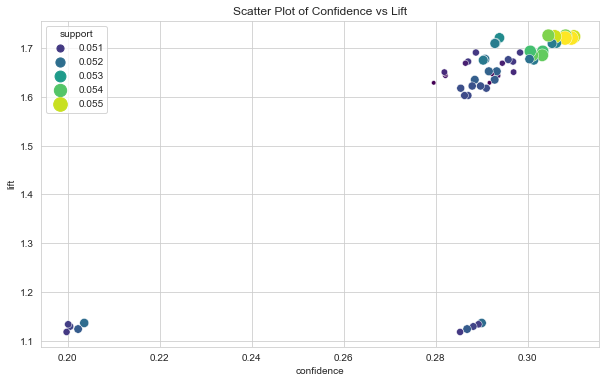

In [128]:
import seaborn as sns

# Scatter plot for confidence vs lift
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='confidence', y='lift', size='support', hue='support', palette='viridis', sizes=(20, 200))
plt.title('Scatter Plot of Confidence vs Lift')
plt.grid(True)
plt.show()


In [105]:
# Pivot table to create an interaction matrix
interaction_matrix = pd.crosstab(data['Customer_ID'], data['Payment_Behaviour'])

# Display the interaction matrix
interaction_matrix.head()


Payment_Behaviour  !@9#%8  High_spent_Large_value_payments  \
Customer_ID                                                  
CUS_0x1000              1                                0   
CUS_0x1009              1                                0   
CUS_0x100b              0                                3   
CUS_0x1011              0                                1   
CUS_0x1013              1                                1   

Payment_Behaviour  High_spent_Medium_value_payments  \
Customer_ID                                           
CUS_0x1000                                        2   
CUS_0x1009                                        5   
CUS_0x100b                                        0   
CUS_0x1011                                        2   
CUS_0x1013                                        4   

Payment_Behaviour  High_spent_Small_value_payments  \
Customer_ID                                          
CUS_0x1000                                       2   
CUS_0x1009                                       1   
CUS_0x100b                                       1   
CUS_0x1011                                       0   
CUS_0x1013                                       0   

Payment_Behaviour  Low_spent_Large_value_payments  \
Customer_ID                                         
CUS_0x1000                                      2   
CUS_0x1009                                      0   
CUS_0x100b                                      1   
CUS_0x1011                                      0   
CUS_0x1013                                      0   

Payment_Behaviour  Low_spent_Medium_value_payments  \
Customer_ID                                          
CUS_0x1000                                       0   
CUS_0x1009                                       1   
CUS_0x100b                                       2   
CUS_0x1011                                       3   
CUS_0x1013                                       2   

Payment_Behaviour  Low_spent_Small_value_payments  
Customer_ID                                        
CUS_0x1000                                      1  
CUS_0x1009                                      0  
CUS_0x100b                                      1  
CUS_0x1011                                      2  
CUS_0x1013                                      0

In [114]:
from sklearn.metrics.pairwise import cosine_similarity

# Transpose the interaction matrix so items are rows and users are columns
item_interaction_matrix = interaction_matrix.T

# Calculate the cosine similarity between items
item_similarity = cosine_similarity(item_interaction_matrix)

# Convert the numpy array to a DataFrame for better readability, with items as both rows and columns
item_similarity_df = pd.DataFrame(item_similarity, index=item_interaction_matrix.index, columns=item_interaction_matrix.index)

# Display the item similarity matrix
print(item_similarity_df.head())


# user_id = 'CUS_0x1000'



Payment_Behaviour                   !@9#%8  High_spent_Large_value_payments  \
Payment_Behaviour                                                             
!@9#%8                            1.000000                         0.374153   
High_spent_Large_value_payments   0.374153                         1.000000   
High_spent_Medium_value_payments  0.413108                         0.507834   
High_spent_Small_value_payments   0.390264                         0.415999   
Low_spent_Large_value_payments    0.383065                         0.390368   

Payment_Behaviour                 High_spent_Medium_value_payments  \
Payment_Behaviour                                                    
!@9#%8                                                    0.413108   
High_spent_Large_value_payments                           0.507834   
High_spent_Medium_value_payments                          1.000000   
High_spent_Small_value_payments                           0.491318   
Low_spent_Large_value_paym

In [120]:
def hybrid_recommend(item, rules, item_similarity_df, top_n=5):
    # Initialize a dictionary to keep track of recommendation scores
    recommendations = {}
    
    # Check for any rules where the item is an antecedent
    if item in rules['antecedents'].unique():
        related_rules = rules[rules['antecedents'].apply(lambda x: item in x)]
        for idx, rule in related_rules.iterrows():
            consequent = list(rule['consequents'])[0]
            # Calculate score based on confidence and lift, and similarity score
            score = rule['confidence'] * rule['lift'] * item_similarity_df.loc[item, consequent]
            recommendations[consequent] = recommendations.get(consequent, 0) + score
    
    # Also include items similar to the given item based on item similarity scores
    similar_items = item_similarity_df[item].sort_values(ascending=False)[1:top_n+1]  # exclude self similarity
    for similar_item, similarity_score in similar_items.iteritems():
        # Adjust the score by similarity alone if no direct association rule exists
        recommendations[similar_item] = recommendations.get(similar_item, 0) + similarity_score
    
    # Sort items by their final scores in descending order
    sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    return sorted_recommendations

# Example usage
item_to_recommend = 'High_spent_Medium_value_payments'
hybrid_recommendations = hybrid_recommend(item_to_recommend, rules, item_similarity_df)
print(f"Hybrid recommendations for {item_to_recommend}:\n{hybrid_recommendations}")


# item_to_recommend = 'Low_spent_Small_value_payments'
# hybrid_recommendations = hybrid_recommend(item_to_recommend, rules, item_similarity_df)
# print(f"Hybrid recommendations for {item_to_recommend}:\n{hybrid_recommendations}")


Hybrid recommendations for High_spent_Medium_value_payments:
[('High_spent_Large_value_payments', 0.5078343102684307), ('High_spent_Small_value_payments', 0.4913179400068449), ('Low_spent_Large_value_payments', 0.4539066588333984), ('Low_spent_Medium_value_payments', 0.42806447577779355), ('Low_spent_Small_value_payments', 0.42122620798500277)]
Hybrid recommendations for Low_spent_Small_value_payments:
[('Low_spent_Medium_value_payments', 0.5155979570767024), ('Low_spent_Large_value_payments', 0.47766060750545297), ('High_spent_Small_value_payments', 0.46907760542487725), ('!@9#%8', 0.4357711135031256), ('High_spent_Medium_value_payments', 0.42122620798500277)]


In [119]:
def hybrid_recommend(user_id, user_items, rules, item_similarity_df, interaction_matrix, top_n=10):
    """
    Generate hybrid recommendations based on association rules and item-based similarities.
    
    Parameters:
    - user_id: ID of the user to recommend items to.
    - user_items: List of items the user has interacted with.
    - rules: DataFrame containing association rules.
    - item_similarity_df: DataFrame containing item-to-item similarities.
    - interaction_matrix: DataFrame of user-item interactions.
    - top_n: Number of recommendations to return.
    
    Returns:
    - List of recommended items with their scores.
    """
    # Find all items that are consequents in the rules where antecedents are items the user has interacted with
    recommended_items = {}
    for item in user_items:
        relevant_rules = rules[rules['antecedents'].apply(lambda x: item in x)]
        for idx, rule in relevant_rules.iterrows():
            for consequent in rule['consequents']:
                if consequent not in user_items:  # Only recommend items the user hasn't interacted with
                    # Calculate a score based on confidence and lift, and similarity to user's items
                    base_score = rule['confidence'] * rule['lift']
                    similarity_score = item_similarity_df.loc[item, consequent] if item in item_similarity_df.index and consequent in item_similarity_df.columns else 0
                    score = base_score * (1 + similarity_score)  # Weighted sum to enhance with similarity
                    
                    if consequent in recommended_items:
                        recommended_items[consequent] += score
                    else:
                        recommended_items[consequent] = score

    # Sort items by the computed scores in descending order
    sorted_items = sorted(recommended_items.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return sorted_items

# Example usage:
user_id = 'CUS_0x1000'  # Specify the correct user ID
user_items = interaction_matrix.columns[interaction_matrix.loc[user_id] > 0].tolist()  # Items the user has interacted with
recommended_items = hybrid_recommend(user_id, user_items, rules, item_similarity_df, interaction_matrix)
print("Recommended Items:", recommended_items)


Recommended Items: [(' Credit-Builder Loan', 0.23147493196531485), (' Payday Loan', 0.22743914686130784), (' Mortgage Loan', 0.22695673117242968), (' Home Equity Loan', 0.22651174421392117), (' Not Specified', 0.22342280452961966)]
